# Statistical Data Visualization

### Plotting Math Functions

In [5]:
def f1(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)


def f2(t):
    return np.cos(2 * np.pi * t2)


t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

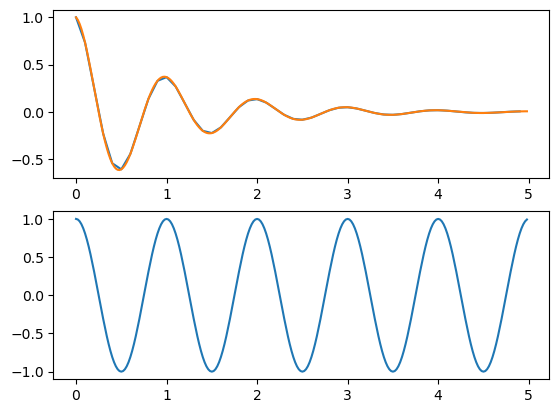

In [13]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t1, f1(t1), t2, f1(t2))

plt.subplot(2, 1, 2)
plt.plot(t2, f2(t2))
plt.show()

### Overlaying the two plots on the same Axes

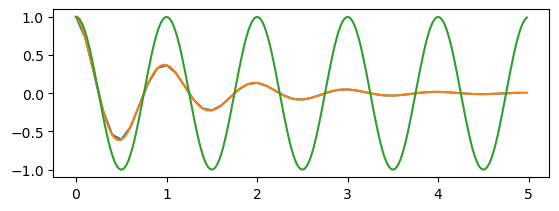

In [14]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t1, f1(t1), t2, f1(t2))

plt.subplot(2, 1, 1)  # <-- using the same index
plt.plot(t2, f2(t2))
plt.show()

### Subplots (Grid)

[`matplotlib.pyplot.subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib-pyplot-subplot)

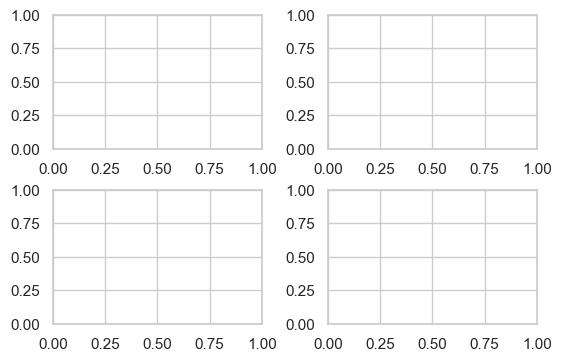

In [79]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5), layout="constrained")

Text(0.5, 0.98, '2x2 plt.subplots()')

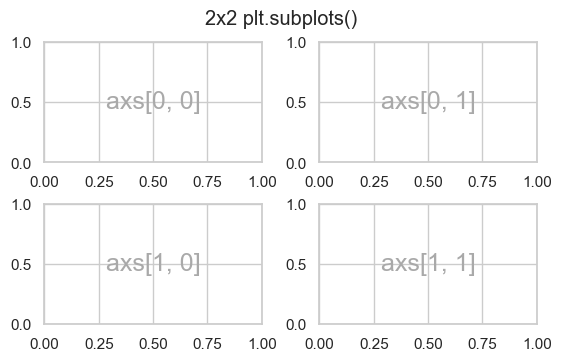

In [80]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5), layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(
            f"axs[{row}, {col}]",
            (0.5, 0.5),
            transform=axs[row, col].transAxes,
            ha="center",
            va="center",
            fontsize=18,
            color="darkgrey",
        )
fig.suptitle("2x2 plt.subplots()")

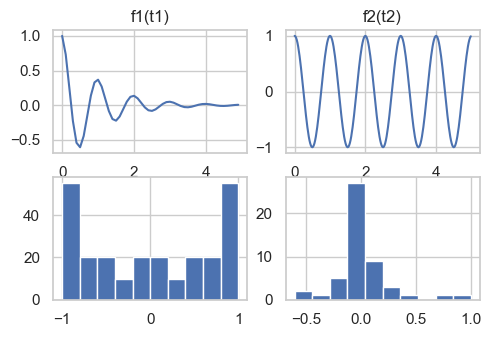

In [81]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5))

axs[0, 0].set_title("f1(t1)")
axs[0, 0].plot(t1, f1(t1))

axs[0, 1].set_title("f2(t2)")
axs[0, 1].plot(t2, f2(t1))

axs[1, 0].hist(f2(t1))

axs[1, 1].hist(f1(t1))

plt.show()

### Custom Plots: Polygons, Shaded Areas, and Equations

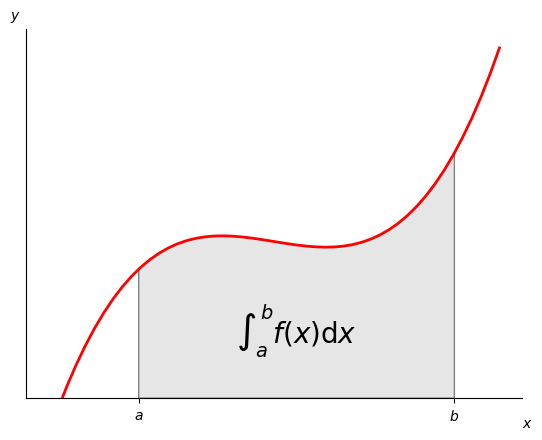

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)  # <-- Return evenly spaced numbers over a specified interval.
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, "r", linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor="0.9", edgecolor="0.5")
ax.add_patch(poly)

# Make the integral equation text (note: LaTeX)
ax.text(
    0.5 * (a + b),
    30,
    r"$\int_a^b f(x)\mathrm{d}x$",
    horizontalalignment="center",
    fontsize=20,
)

# Freely put the "x" and "y" (top-left and bottom-right)
fig.text(0.9, 0.05, "$x$")
fig.text(0.1, 0.9, "$y$")

# Remove top and right borders
ax.spines[["top", "right"]].set_visible(False)

# x- and y-ticks
ax.set_xticks([a, b], labels=["$a$", "$b$"])
ax.set_yticks([])

plt.show()

## Seaborn

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib

In [8]:
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

2.0.3
0.12.2
3.7.2


### Grouped barplots

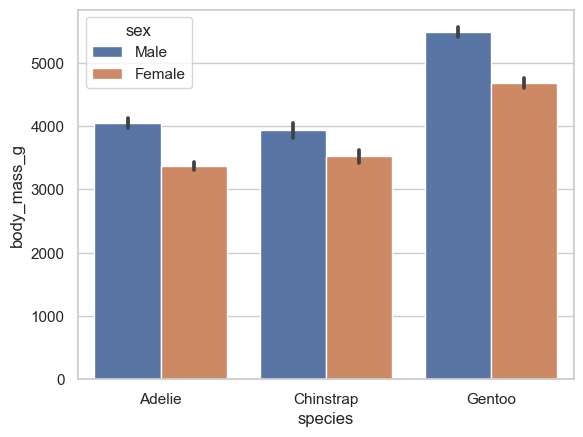

In [17]:
import seaborn as sns

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
sns.barplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    hue="sex",
)
plt.show()

Text(0.5, 0.98, 'Distributed species in seaborn subplots')

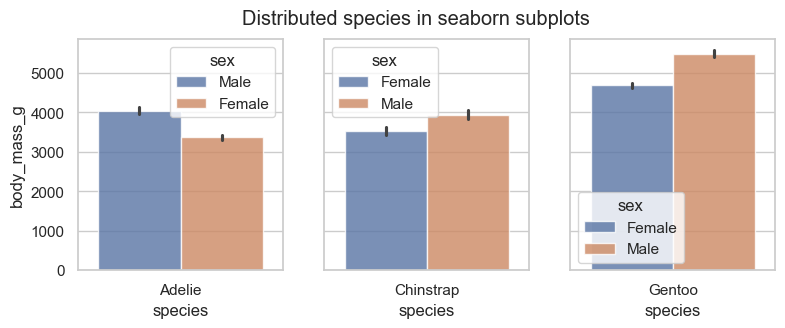

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)  # <-- share the y-axis

# Plot each species separately in each subplot
for i, species in enumerate(penguins["species"].unique()):
    sns.barplot(
        ax=axs[i],
        data=penguins[penguins["species"] == species],
        x="species",
        y="body_mass_g",
        hue="sex",
        alpha=0.8,
    )

fig.suptitle("Distributed species in seaborn subplots")

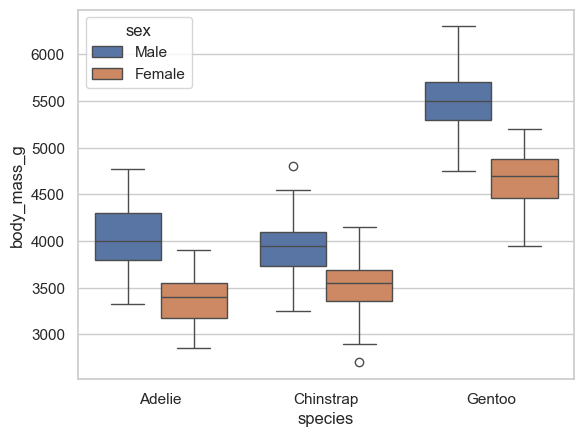

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

sns.boxplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    hue="sex",
)
plt.show()

### Pair Plot

In [10]:
df = sns.load_dataset("penguins")

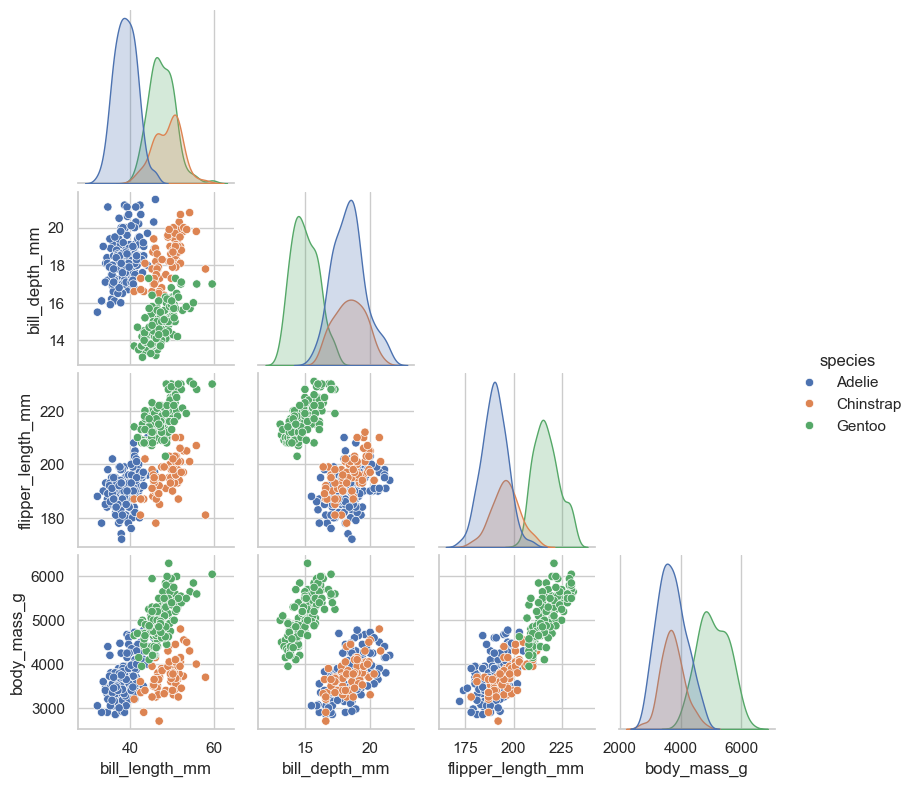

In [11]:
sns.pairplot(df, hue="species", height=2, corner=True)

### Joint Plot

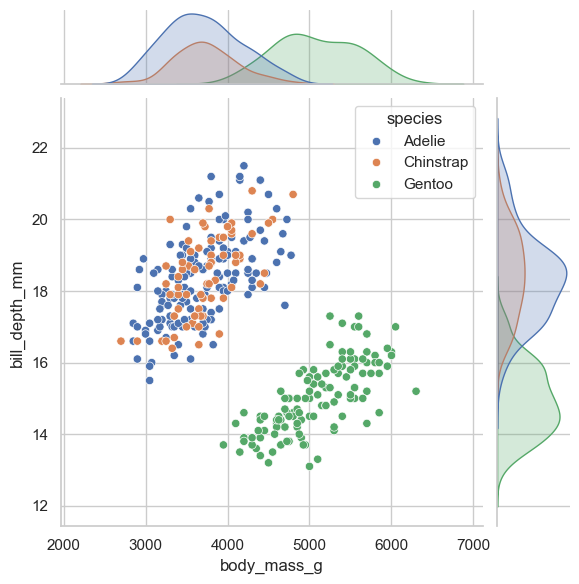

In [12]:
sns.jointplot(data=df, x="body_mass_g", y="bill_depth_mm", hue="species")